<a href="https://colab.research.google.com/github/contactwithshubham/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone 1/Hotel Bookings.csv')


In [4]:
df=pd.DataFrame(file_path)

Analysing the data through getting its information.

In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#**1.Handling null values and dropping unnecessary variables**

In [7]:
df.isnull().sum().sort_values(ascending=False).head()

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \ We will replace null values by 0 in these columns

In [8]:
df[['company','agent']]=df[['company','agent']].fillna(0)

Country columns represents the country fro which the particular customer belongs so we will replace the null values in the country column with "other" as the columns datatype is string type.

In [9]:
df['country']=df['country'].fillna('OTHER')

For children as from zero values it is understood that the respective guest didn't check in with any child but here we have some null values as well so we need to take care of those. As it is not possible to get or predict the exact no so we could use some maths over here. We can use the mean of the children checked in the hotel as the null value. 

In [10]:
df['children']=df['children'].fillna(df['children'].mean())
df['children'].unique()

array([ 0.       ,  1.       ,  2.       , 10.       ,  3.       ,
        0.1038899])

**lets check again the null values in our dataframe.**

In [11]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

*Hence,we have no  null values in the data.*

#**As it is clear from the data the there are values like children,agent & company in float type which should have to be in int datatype so lets conver their data type to float**

In [12]:
df[['children','company', 'agent']] = df[['children','company', 'agent']].astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

Thus we have successfully changed the data type of te mentioned columns.

#**Looking for Duplicate Values in the DataFrame**

In [14]:
df[df.duplicated()]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250,0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250,0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240,0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240,0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9,0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


As we can see there are about 32000 duplicate rows so in order to get accurate analysis we need to remove these duplicate values from the DataFrame.

In [15]:
df.drop_duplicates(inplace=True) #Removing duplicate  rows in the data

In [16]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


**We have successfully removed the duplicate values from our data.**

In [17]:
df.shape  # Our New Shape 

(87396, 32)

#**Now we need to Analyse our date in  order to extract some useful output.**

#**Analysis w.r.t. Distribution Channel.**

As for in the hotel industry booking is one of the key  factors & there are different modes of booking for each hotel. These modes of booking are  called distribution channel. We are  going to analyse or data w.r.t. Distribution Channel. 

We will analyse our data on below mentioned points.

1.Which  Distribution Channel is contributing in most  of the hotel  bookings?

2.Which channel is  contributing most for early booking of the hotel?

3.Which distribution channel brings better revenue generating deals for hotels?




#1.Which  Distribution Channel is contributing in most  of the hotel  bookings?

In [18]:
df["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [19]:
distribution_channel_analysis=df["distribution_channel"].value_counts()
print(distribution_channel_analysis)


TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64


Text(0.5, 1.0, 'Booking % by Distribution Channels')

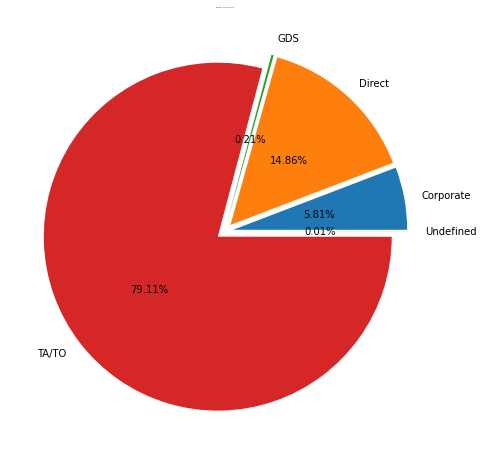

In [24]:
group_by_dc=df.groupby('distribution_channel')
d1=pd.DataFrame(round(group_by_dc.size()/df.shape[0]*100,2)).reset_index().rename(columns={0:'Booking_%'})
plt.figure(figsize=(8,8))
data=d1['Booking_%']
labels=d1['distribution_channel']
plt.pie(x=data,autopct='%.2f%%', explode=[0.05]*5, labels=labels,pctdistance=0.5)
plt.title('Booking % by Distribution Channels', fontsize=1)

**Analysisi from above graph.**

1- Highest Booking received by the hotels are through TA/OT so they are one of the most trusted booking provider.

2- Also Direct booking count is greater than GDS system so still customer does not have complete faith over online booking platforms.

#2.Which channel is  contributing most for early booking of the hotel?

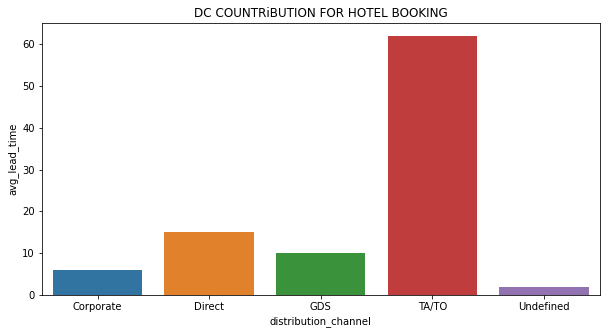

In [25]:
group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'avg_lead_time'})
plt.figure(figsize = (10,5))
sns.barplot(x = d2['distribution_channel'], y = d2['avg_lead_time'])
plt.title("DC COUNTRiBUTION FOR HOTEL BOOKING")
plt.show()


In [29]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

#3. Which distribution channel brings better revenue generating deals for hotels?


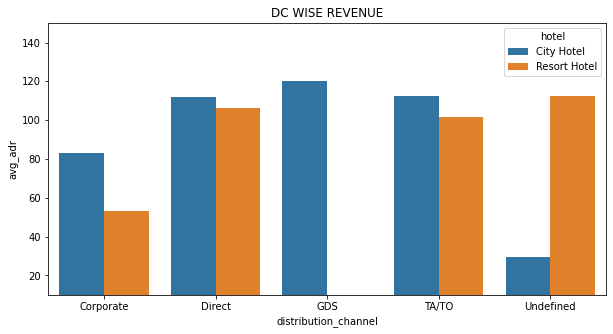

In [32]:
group_by_dc_hotel = df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (10,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(10,150)
plt.title("DC WISE REVENUE")
plt.show()


Conlusions could be drawn from above analysis:

1-In terms of revenue GDS is the most revenue generating Channel but its only for City hotel. For Resort Hotel its contribution is negligible as compared to other channels distribution.

2- Undefined can be associated to multiple channel distribution channels whose data is not provided so after undefined bookings from TA/TO are generating most revenue for the  Resort Hotel. 

3-Apart from other ditribution channel Direct bookings are also playing the crucial role in terms of revenue generation but  we need to focus more on other less revenue generating mediums in order to increase the overall revenue.

#4.Which is the most favourable Channel for Customers to book hotel?


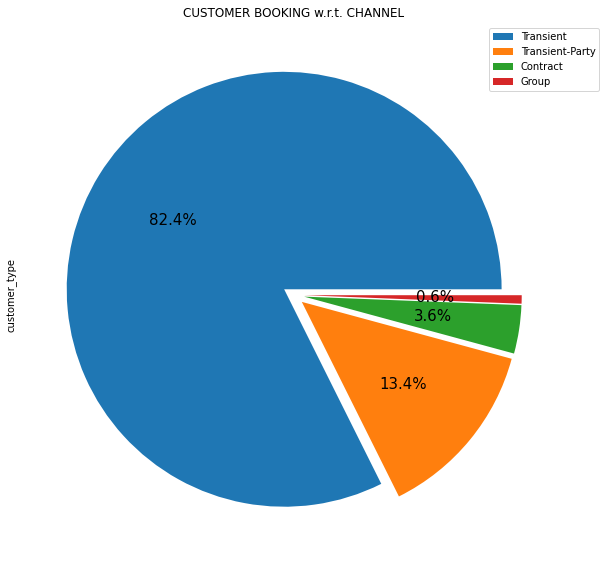

In [44]:
df['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow= False,autopct='%1.1f%%', fontsize=15,labels=None, figsize=(10,10))
labels=df['customer_type'].value_counts().index.tolist()
plt.title("CUSTOMER BOOKING w.r.t. CHANNEL")
plt.legend(bbox_to_anchor=(0.85,1), loc='upper left', labels=labels)
# plt.show()

Transient Booking - These are walk-in bookings, last minute or bookers or simply people that require a very short term stay

Transient Party - They are somewhere linked to Transient Group.

Contract Booking- These booking are on contract basis made by the hoteliers with their partners.

Group Booking- The booking made in groups of 1 or more than 1 room. Generraly it is of more than 1 room.